In [402]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

In [403]:
### training dataset ###
train_data = pd.read_csv("/home/matz/Downloads/2015_Kyoto/Kyoto2016/2015/11/20151116.txt", sep = "\t", header = None)
train_data.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]
df1 = pd.read_csv("/home/matz/Downloads/2015_Kyoto/Kyoto2016/2015/11/20151127.txt", sep = "\t", header = None)
df1.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]
df2 = pd.read_csv("/home/matz/Downloads/2015_Kyoto/Kyoto2016/2015/11/20151103.txt", sep = "\t", header = None)
df2.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]
train_data = train_data.append(df1, ignore_index=True)
train_data = train_data.append(df2, ignore_index=True)
# slice dataset up to attack flag column, drop additional features

#train_data = train_data.loc[:, :'attack_flag']
train_data = train_data.drop(['start time', 'dst IP', 'src IP'], axis=1)

# drop software markers
train_data = train_data.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)
train_data["upstream data rate"] = train_data["src bytes"]/train_data["conn len"]
train_data["downstream data rate"] = train_data["dst bytes"]/train_data["conn len"]
train_data["attack_flag"].value_counts()

train_attack = train_data.loc[(train_data['attack_flag'] == -1)]
train_normal = train_data.loc[(train_data['attack_flag'] == 1)]
train_unknown_attack = train_data.loc[(train_data['attack_flag'] == -2)]
train_attack_red = train_attack.sample(n=25000, random_state = 1)
train_normal_red = train_normal.sample(n=25000, random_state = 1)

train_red = train_attack_red
train_red = train_red.append(train_normal_red, ignore_index=True)
train_red = train_red.append(train_unknown_attack, ignore_index=True)

/home/matz/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [404]:
### testing dataset ###
test_data = pd.read_csv("/home/matz/Downloads/2015_Kyoto/Kyoto2016/2015/12/20151219.txt", sep = "\t", header = None)
test_data.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]
df3 = pd.read_csv("/home/matz/Downloads/2015_Kyoto/Kyoto2016/2015/12/20151226.txt", sep = "\t", header = None)
df3.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]
df4 = pd.read_csv("/home/matz/Downloads/2015_Kyoto/Kyoto2016/2015/12/20151203.txt", sep = "\t", header = None)
df4.columns = ["conn len", "service", "src bytes", "dst bytes", "conn numb", "Same srv rate", "Serror rate", "Srv serror rate", "Dst host count", "Dst host srv count", "Dst host same src port rate", "Dst host serror rate", "Dst host srv serror rate", "Conn state", "IDS detection", "Malware detection", "Ashula detection", "attack_flag", "src IP", "src port", "dst IP", "dst port", "start time", "proto"]
test_data = test_data.append(df3, ignore_index=True)
test_data = test_data.append(df4, ignore_index=True)


test_data.info()
print(test_data["proto"].value_counts(dropna=False))

# slice dataset up to attack flag column, drop additional features
#test_data = test_data.loc[:, :'attack_flag']
test_data = test_data.drop(['start time', 'dst IP', 'src IP'], axis=1)

# drop software markers
test_data = test_data.drop(["IDS detection", "Malware detection", "Ashula detection"], axis=1)
test_data["upstream data rate"] = test_data["src bytes"]/test_data["conn len"]
test_data["downstream data rate"] = test_data["dst bytes"]/test_data["conn len"]
test_data["attack_flag"].value_counts()

test_attack = test_data.loc[(test_data['attack_flag'] == -1)]
test_normal = test_data.loc[(test_data['attack_flag'] == 1)]
test_unknown_attack = test_data.loc[(test_data['attack_flag'] == -2)]
test_attack_red = test_attack.sample(n=100000)
test_normal_red = test_normal.sample(n=100000)

test_red = test_attack_red
test_red = test_red.append(test_normal_red, ignore_index=True)
test_red = test_red.append(test_unknown_attack, ignore_index=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818406 entries, 0 to 818405
Data columns (total 24 columns):
conn len                       818406 non-null float64
service                        818406 non-null object
src bytes                      818406 non-null int64
dst bytes                      818406 non-null int64
conn numb                      818406 non-null int64
Same srv rate                  818406 non-null float64
Serror rate                    818406 non-null float64
Srv serror rate                818406 non-null float64
Dst host count                 818406 non-null int64
Dst host srv count             818406 non-null int64
Dst host same src port rate    818406 non-null float64
Dst host serror rate           818406 non-null float64
Dst host srv serror rate       818406 non-null float64
Conn state                     818406 non-null object
IDS detection                  818406 non-null object
Malware detection              818406 non-null object
Ashula detection       

In [405]:
train_red.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,Conn state,attack_flag,src port,dst port,proto,upstream data rate,downstream data rate
50037,7.491539,other,2455,1468,2,1.0,0.0,0.00,1,15,0.00,0.00,0.40,SF,-2,3651,445,tcp,327.703026,195.954396
50038,4.884188,other,2469,1468,1,1.0,0.0,0.00,3,3,0.00,0.00,0.00,SF,-2,3265,445,tcp,505.508797,300.561731
50039,3.016455,other,0,0,0,0.0,0.0,1.00,7,7,0.00,0.29,0.29,S0,-2,1760,445,tcp,0.000000,0.000000
50040,12.943828,other,2469,1468,0,0.0,0.0,0.00,8,8,0.12,0.38,0.38,SF,-2,1760,445,tcp,190.747281,113.413126
50041,6.709910,other,2451,1468,2,1.0,0.0,0.29,1,3,0.00,0.00,0.00,SF,-2,61236,445,tcp,365.280607,218.780878
50042,1.300091,other,2647,1516,2,1.0,0.0,0.56,1,41,0.00,0.00,0.85,SF,-2,2806,445,tcp,2036.011325,1166.072221
50043,7.483030,other,2619,1516,2,1.0,0.0,0.93,1,1,0.00,0.00,0.00,SF,-2,1753,445,tcp,349.991915,202.591731
50044,2.143790,other,2647,745,1,1.0,0.0,0.60,3,10,0.00,0.00,0.00,RSTO,-2,34686,139,tcp,1234.729148,347.515382
50045,6.879202,other,2605,1516,2,1.0,0.0,0.44,1,1,0.00,0.00,0.00,SF,-2,2418,445,tcp,378.677643,220.374398
50046,0.944318,other,2491,1468,3,1.0,0.0,0.87,5,9,0.00,0.00,0.00,SF,-2,1139,445,tcp,2637.882578,1554.561069


In [406]:
print(train_red.shape)
print(test_red.shape)

(50047, 20)
(200010, 20)


In [407]:
# removing NaNs
train_red = train_red.dropna()
test_red = test_red.dropna()

In [408]:
print(train_red.shape)
print(test_red.shape)

(37473, 20)
(149226, 20)


In [409]:
train_red.describe()

,conn len,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,Dst host same src port rate,Dst host serror rate,Dst host srv serror rate,attack_flag,src port,dst port,upstream data rate,downstream data rate
count,37473.000000,37473.000000,37473.000000,37473.000000,37473.000000,37473.000000,37473.000000,37473.000000,37473.000000,37473.000000,37473.000000,37473.000000,37473.000000,37473.000000,37473.000000,3.747300e+04,3.747300e+04
mean,0.997604,156.167721,488.719611,6.459771,0.717633,0.026645,0.192364,59.546020,68.479092,0.014563,0.051218,0.083664,0.313346,40376.549489,1851.239239,1.723188e+05,2.099687e+05
std,6.707971,362.165426,3138.949791,8.606295,0.443401,0.151356,0.362146,39.161382,39.148959,0.117463,0.212779,0.268047,0.951631,16851.288584,9465.968830,3.462909e+06,7.975500e+05
min,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,3.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.000344,43.000000,46.000000,0.000000,0.000000,0.000000,0.000000,27.000000,31.000000,0.000000,0.000000,0.000000,-1.000000,35127.000000,23.000000,1.859920e+02,3.423127e+02
50%,0.000502,50.000000,99.000000,3.000000,1.000000,0.000000,0.000000,67.000000,94.000000,0.000000,0.000000,0.000000,1.000000,43869.000000,53.000000,8.665511e+04,1.367292e+05
75%,1.209938,78.000000,131.000000,8.000000,1.000000,0.000000,0.080000,98.000000,99.000000,0.000000,0.000000,0.000000,1.000000,52915.000000,53.000000,1.392405e+05,2.749326e+05
max,850.491280,16921.000000,168595.000000,57.000000,1.000000,1.000000,1.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,65535.000000,65475.000000,3.420000e+08,4.100000e+07


In [410]:
train_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37473 entries, 1 to 50046
Data columns (total 20 columns):
conn len                       37473 non-null float64
service                        37473 non-null object
src bytes                      37473 non-null int64
dst bytes                      37473 non-null int64
conn numb                      37473 non-null int64
Same srv rate                  37473 non-null float64
Serror rate                    37473 non-null float64
Srv serror rate                37473 non-null float64
Dst host count                 37473 non-null int64
Dst host srv count             37473 non-null int64
Dst host same src port rate    37473 non-null float64
Dst host serror rate           37473 non-null float64
Dst host srv serror rate       37473 non-null float64
Conn state                     37473 non-null object
attack_flag                    37473 non-null int64
src port                       37473 non-null int64
dst port                       37473 non-nu

In [411]:
train_red["Conn state"].value_counts(dropna=False)

SF        22881
S0         6939
RSTO       6074
REJ         979
RSTR        400
OTH         158
RSTRH        16
SHR           9
S1            8
RSTOS0        5
S2            2
S3            2
Name: Conn state, dtype: int64

In [412]:
train_red["service"].value_counts(dropna=False)

dns      21512
other     8610
ssh       6838
smtp       425
rdp         65
http        15
snmp         8
Name: service, dtype: int64

In [413]:
### training dataset hot one encoding ###

# hot one encoding for service
train_red = pd.concat([train_red, pd.get_dummies(train_red["service"], prefix="is")], axis=1)
train_red.tail(10)

# hot one encoding for proto - commented due to reduced column number
train_red = pd.concat([train_red, pd.get_dummies(train_red["proto"], prefix="is")], axis=1)
train_red.tail(10)

# hot one encoding for conn state
train_red = pd.concat([train_red, pd.get_dummies(train_red["Conn state"], prefix="state")], axis=1)
train_red.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,...,state_RSTO,state_RSTOS0,state_RSTR,state_RSTRH,state_S0,state_S1,state_S2,state_S3,state_SF,state_SHR
50037,7.491539,other,2455,1468,2,1.0,0.0,0.00,1,15,...,0,0,0,0,0,0,0,0,1,0
50038,4.884188,other,2469,1468,1,1.0,0.0,0.00,3,3,...,0,0,0,0,0,0,0,0,1,0
50039,3.016455,other,0,0,0,0.0,0.0,1.00,7,7,...,0,0,0,0,1,0,0,0,0,0
50040,12.943828,other,2469,1468,0,0.0,0.0,0.00,8,8,...,0,0,0,0,0,0,0,0,1,0
50041,6.709910,other,2451,1468,2,1.0,0.0,0.29,1,3,...,0,0,0,0,0,0,0,0,1,0
50042,1.300091,other,2647,1516,2,1.0,0.0,0.56,1,41,...,0,0,0,0,0,0,0,0,1,0
50043,7.483030,other,2619,1516,2,1.0,0.0,0.93,1,1,...,0,0,0,0,0,0,0,0,1,0
50044,2.143790,other,2647,745,1,1.0,0.0,0.60,3,10,...,1,0,0,0,0,0,0,0,0,0
50045,6.879202,other,2605,1516,2,1.0,0.0,0.44,1,1,...,0,0,0,0,0,0,0,0,1,0
50046,0.944318,other,2491,1468,3,1.0,0.0,0.87,5,9,...,0,0,0,0,0,0,0,0,1,0


In [414]:
### testing dataset hot one encoding ###

# hot one encoding for service
test_red = pd.concat([test_red, pd.get_dummies(test_red["service"], prefix="is")], axis=1)
test_red.tail(10)

# hot one encoding for proto - commented due to reduced column number
test_red = pd.concat([test_red, pd.get_dummies(test_red["proto"], prefix="is")], axis=1)
test_red.tail(10)

# hot one encoding for conn state
test_red = pd.concat([test_red, pd.get_dummies(test_red["Conn state"], prefix="state")], axis=1)
test_red.tail(10)

,conn len,service,src bytes,dst bytes,conn numb,Same srv rate,Serror rate,Srv serror rate,Dst host count,Dst host srv count,...,state_RSTO,state_RSTOS0,state_RSTR,state_RSTRH,state_S0,state_S1,state_S2,state_S3,state_SF,state_SHR
200000,6.733803,other,2457,1468,2,1.0,0.00,0.50,1,1,...,0,0,0,0,0,0,0,0,1,0
200001,4.740597,other,2465,1468,3,1.0,0.00,0.40,1,64,...,0,0,0,0,0,0,0,0,1,0
200002,46683.468919,other,2478,1395,2,1.0,0.00,0.67,1,3,...,0,0,0,0,0,1,0,0,0,0
200003,3.350512,other,2617,1516,2,1.0,0.00,0.33,1,3,...,0,0,0,0,0,0,0,0,1,0
200004,6.163439,other,2453,1468,2,1.0,0.00,0.60,1,2,...,0,0,0,0,0,0,0,0,1,0
200005,7.045184,other,2615,1546,1,1.0,0.00,0.75,3,61,...,0,0,0,0,0,0,0,0,1,0
200006,6.972637,other,2615,1546,2,1.0,0.00,0.81,3,58,...,0,0,0,0,0,0,0,0,1,0
200007,2.968651,other,2491,1468,1,1.0,0.00,0.67,1,3,...,0,0,0,0,0,0,0,0,1,0
200008,19.301852,other,8947,3428,4,1.0,0.75,0.80,1,49,...,0,0,0,0,0,0,0,0,1,0
200009,7.147713,other,2617,1546,2,1.0,0.00,0.50,1,3,...,0,0,0,0,0,0,0,0,1,0


In [415]:
train_red.shape

(37473, 42)

In [416]:
train_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37473 entries, 1 to 50046
Data columns (total 42 columns):
conn len                       37473 non-null float64
service                        37473 non-null object
src bytes                      37473 non-null int64
dst bytes                      37473 non-null int64
conn numb                      37473 non-null int64
Same srv rate                  37473 non-null float64
Serror rate                    37473 non-null float64
Srv serror rate                37473 non-null float64
Dst host count                 37473 non-null int64
Dst host srv count             37473 non-null int64
Dst host same src port rate    37473 non-null float64
Dst host serror rate           37473 non-null float64
Dst host srv serror rate       37473 non-null float64
Conn state                     37473 non-null object
attack_flag                    37473 non-null int64
src port                       37473 non-null int64
dst port                       37473 non-nu

In [417]:
# check differences between datasets after hot one encoding

train_red.columns.difference(test_red.columns)
# print(train_data.columns.difference(test_data.columns)[0])
for c in train_red.columns.difference(test_red.columns):
    test_red[c] = 0
for c in test_red.columns.difference(train_red.columns):
    train_red[c] = 0


## Data visualization

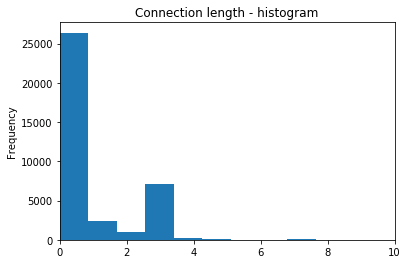

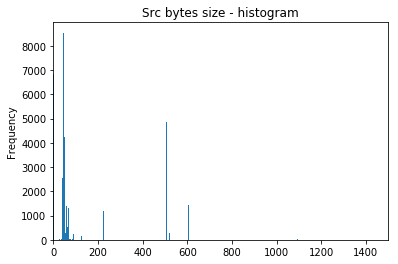

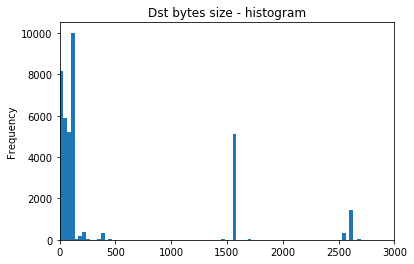

In [418]:
# hisotgrams
# data[data.column > 1000]
#print(max(train_red['conn len']))
train_red['conn len'].plot.hist(bins=1000, xlim=[0,10], title="Connection length - histogram")
plt.show()

#print(max(train_red['src bytes']))
train_red['src bytes'].plot.hist(bins=5000, xlim=[0,1500], title="Src bytes size - histogram")
plt.show()

#print(max(train_red['dst bytes']))
train_red['dst bytes'].plot.hist(bins=5000, xlim=[0,3000], title="Dst bytes size - histogram")
plt.show()

Text(0.5,0.98,'')

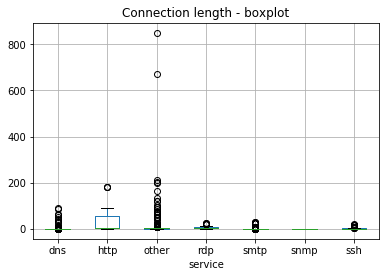

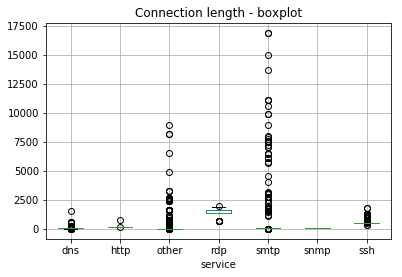

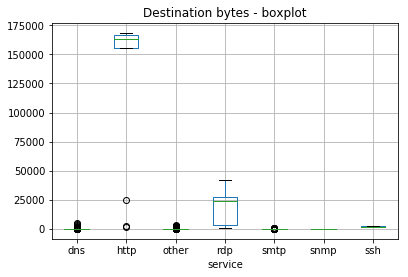

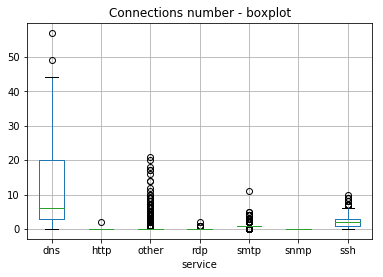

In [419]:
# boxplots
train_red.boxplot(column='conn len', by='service')
plt.title("Connection length - boxplot")
plt.suptitle("")

train_red.boxplot(column='src bytes', by='service')
plt.title("Connection length - boxplot")
plt.suptitle("")

train_red.boxplot(column='dst bytes', by='service')
plt.title("Destination bytes - boxplot")
plt.suptitle("")

train_red.boxplot(column='conn numb', by='service')
plt.title("Connections number - boxplot")
plt.suptitle("")

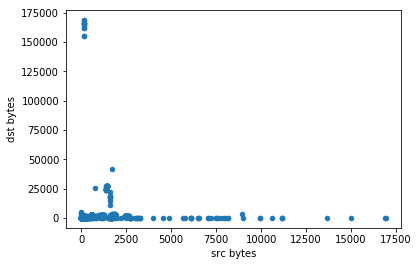

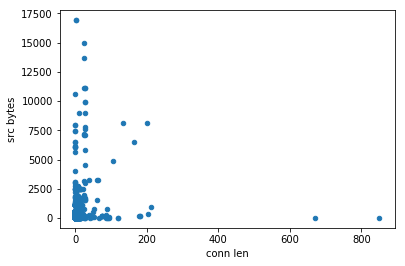

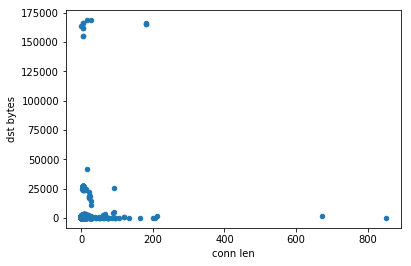

In [420]:
# scatter plots
train_red.plot.scatter(x='src bytes', y= 'dst bytes')
train_red.plot.scatter(x='conn len', y= 'src bytes')
train_red.plot.scatter(x='conn len', y= 'dst bytes')

In [421]:
### training dataset - drop categorical columns ####

train_red = train_red.drop(["service", "Conn state", "proto"], axis=1)

In [422]:
### testing dataset - drop categorical columns ####

test_red = test_red.drop(["service", "Conn state", "proto"], axis=1)

## First experiments with algorithms

In [423]:
train_red.shape

(37473, 39)

In [424]:
### training dataset - make the dataset binary one ###
train_red.loc[:, "attack_flag"] = train_red.loc[:,"attack_flag"].replace(-2, -1)
train_red.loc[:, "attack_flag"] = train_red.loc[:, "attack_flag"] * -1

In [425]:
### testing dataset - make the dataset binary one ###
test_red.loc[:, "attack_flag"] = test_red.loc[:,"attack_flag"].replace(-2, -1)
test_red.loc[:, "attack_flag"] = test_red.loc[:, "attack_flag"] * -1

In [426]:
# plotting method definition

def plot_stats(stat, name):
    fig, ax = plt.subplots(figsize=(8, 4))    
    ax.bar(range(len(stat)), list(stat.values()), align='center')
    plt.xticks(range(len(stat)), list(stat.keys()), rotation=35)
    for a,b in enumerate(stat.items()):
        ax.text(a, b[1] + max(stat.values())/60 , str(round(b[1],5)), horizontalalignment ='center', verticalalignment='baseline')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(name + " of tested algorithms")
    plt.show()

In [427]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from collections import Counter

import matplotlib.pyplot as plt

#sampled_train_data = train_red.sample(n=30000, random_state=1)
#sampled_test_data = test_red.sample(n=30000, random_state=1)

sampled_train_data = train_red
sampled_test_data = test_red

X = sampled_train_data.loc[:, sampled_train_data.columns != 'attack_flag']
y = sampled_train_data.loc[:, sampled_train_data.columns == 'attack_flag'].values.ravel()
X_train, a, y_train, b = train_test_split(X, y, test_size=0.3, random_state=4)

X = sampled_test_data.loc[:, sampled_test_data.columns != 'attack_flag']
y = sampled_test_data.loc[:, sampled_test_data.columns == 'attack_flag'].values.ravel()
a, X_test, b, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

seed = 12

print(Counter(y_test))
print(Counter(y_train))

# wykres po num_trees od 2-40 co 2 dla przykładu

num_trees = 35
kfold = KFold(n_splits=10, random_state=seed)

classifiers = {"AdaBoost":AdaBoostClassifier(n_estimators=num_trees, random_state=seed),
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomForest":RandomForestClassifier(n_estimators=36, max_depth=22, random_state=0)}

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

for name, clf in classifiers.items():
    
    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))



Counter({-1: 29409, 1: 15359})
Counter({-1: 17178, 1: 9053})
Algorithm: AdaBoost     Accuracy: 0.93004, F1-score: 0.89009, Precision: 0.96536, Recall: 0.82570, FPR: 0.01547
TN: 28954; FP: 455; FN: 2677; TP: 12682

Algorithm: DecisionTree Accuracy: 0.76128, F1-score: 0.72058, Precision: 0.60206, Recall: 0.89719, FPR: 0.30970
TN: 20301; FP: 9108; FN: 1579; TP: 13780

Algorithm: NaiveBayes   Accuracy: 0.71305, F1-score: 0.30675, Precision: 0.89625, Recall: 0.18504, FPR: 0.01119
TN: 29080; FP: 329; FN: 12517; TP: 2842

Algorithm: RandomTree   Accuracy: 0.73521, F1-score: 0.52059, Precision: 0.68709, Recall: 0.41904, FPR: 0.09966
TN: 26478; FP: 2931; FN: 8923; TP: 6436

Algorithm: RandomForest Accuracy: 0.95316, F1-score: 0.92941, Precision: 0.96216, Recall: 0.89882, FPR: 0.01846
TN: 28866; FP: 543; FN: 1554; TP: 13805



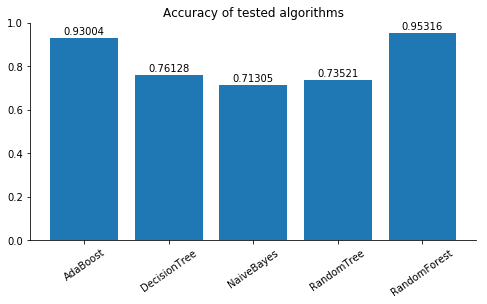

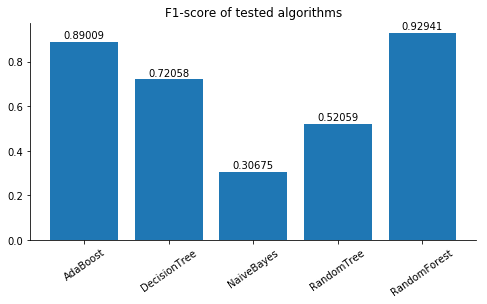

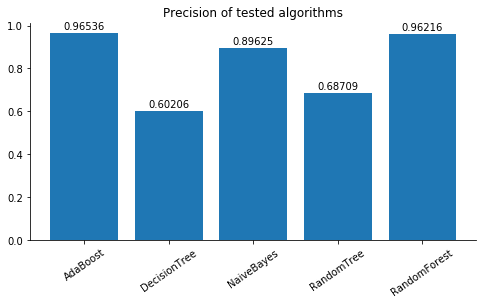

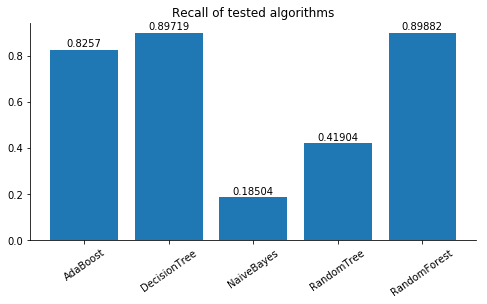

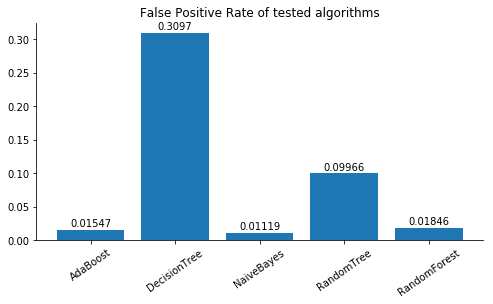

In [428]:
plot_stats(Acc, "Accuracy")
plot_stats(F1S, "F1-score")
plot_stats(Prec, "Precision")
plot_stats(Rec, "Recall")
plot_stats(FPR, "False Positive Rate")

In [429]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from collections import Counter
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt


# wykres po num_trees od 2-40 co 2 dla przykładu

Acc = {}
F1S = {}
Prec = {}
Rec = {}
FPR = {}

num_trees = 35
kfold = KFold(n_splits=10, random_state=seed)

classifiers = {"AdaBoost":AdaBoostClassifier(n_estimators=num_trees, random_state=seed),
               "DecisionTree":DecisionTreeClassifier(random_state=0),
               "NaiveBayes":GaussianNB(),
               "RandomTree":DecisionTreeClassifier(random_state=0, splitter = "random"),
               "RandomForest":RandomForestClassifier(n_estimators=36, max_depth=22, random_state=0)}


for name, clf in classifiers.items():
    
    name = name + "_scaled"
    clf_scaled = make_pipeline(StandardScaler(), clf)
    model = clf_scaled.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    Acc[name] = metrics.accuracy_score(y_test, y_pred)
    F1S[name] = metrics.f1_score(y_test, y_pred)
    Prec[name] = metrics.precision_score(y_test, y_pred)
    Rec[name] = metrics.recall_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    FPR[name] = fp/(fp+tn)
    
    print("Algorithm: {0:12} Accuracy: {1:.5f}, F1-score: {2:.5f}, Precision: {3:.5f}, Recall: {4:.5f}, FPR: {5:.5f}".format(name, Acc[name], F1S[name], Prec[name], Rec[name], FPR[name]))
    print("TN: {0:3}; FP: {1:3}; FN: {2:4}; TP: {3:3}\n".format(tn, fp, fn, tp))



/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


Algorithm: AdaBoost_scaled Accuracy: 0.93004, F1-score: 0.89009, Precision: 0.96536, Recall: 0.82570, FPR: 0.01547
TN: 28954; FP: 455; FN: 2677; TP: 12682



/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Algorithm: DecisionTree_scaled Accuracy: 0.76135, F1-score: 0.72065, Precision: 0.60213, Recall: 0.89726, FPR: 0.30963
TN: 20303; FP: 9106; FN: 1578; TP: 13781

Algorithm: NaiveBayes_scaled Accuracy: 0.79749, F1-score: 0.71557, Precision: 0.69052, Recall: 0.74250, FPR: 0.17379
TN: 24298; FP: 5111; FN: 3955; TP: 11404

Algorithm: RandomTree_scaled Accuracy: 0.73517, F1-score: 0.52047, Precision: 0.68703, Recall: 0.41891, FPR: 0.09966
TN: 26478; FP: 2931; FN: 8925; TP: 6434



/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/matz/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/matz/.local/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: 

Algorithm: RandomForest_scaled Accuracy: 0.94793, F1-score: 0.92227, Precision: 0.94525, Recall: 0.90038, FPR: 0.02724
TN: 28608; FP: 801; FN: 1530; TP: 13829



/home/matz/.local/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


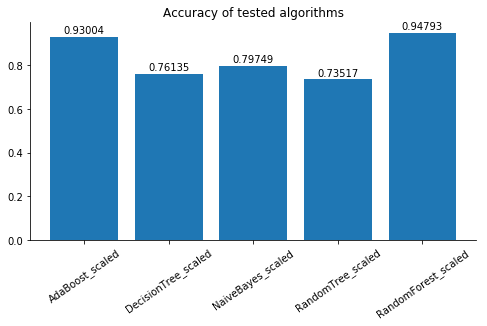

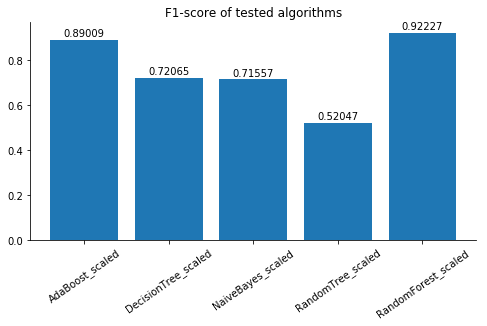

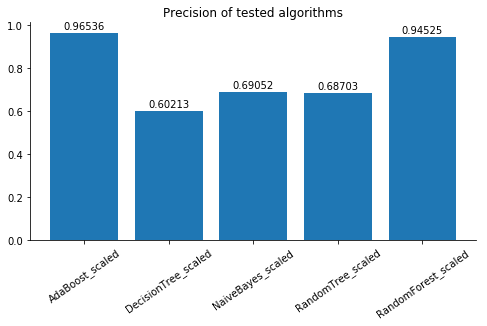

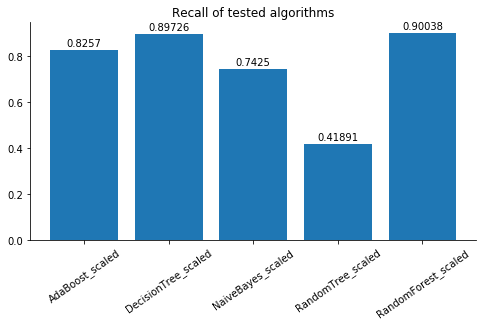

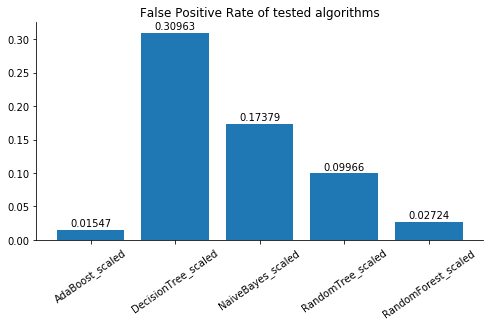

In [430]:
plot_stats(Acc, "Accuracy")
plot_stats(F1S, "F1-score")
plot_stats(Prec, "Precision")
plot_stats(Rec, "Recall")
plot_stats(FPR, "False Positive Rate")